In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
#Carrega os dados dos clientes que receberam empréstimos
retail_data = pd.read_excel('Retail_Data.xlsx')

In [25]:
#Carrega os dados dos potenciais clientes
potential_customers = pd.read_excel('Potential_Customers.xlsx')

In [26]:
#Seleciona as features e o target
features = ['RELACIONAMENTO', 'ESTADO_CIVIL', 'GRADUACAO', 'EMPREGO', 'RENDA', 'SALDO_ATUAL']
X = retail_data[features]
y = retail_data['HIPOTECA']

In [27]:
# Converte colunas categóricas em variáveis dummy
X = pd.get_dummies(X, drop_first=True)

In [28]:
#Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#Padroniza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Carrega os dados dos potenciais clientes
potential_customers = pd.read_excel('Potential_Customers.xlsx')

In [31]:
# Converte colunas categóricas em variáveis dummy para potential_customers
potential_customers = pd.get_dummies(potential_customers[features], drop_first=True)

In [32]:
# Alinha as colunas de potential_customers com X_train
potential_customers = potential_customers.reindex(columns=X.columns, fill_value=0)

In [33]:
# Padroniza os dados dos potenciais clientes
potential_customers_scaled = scaler.transform(potential_customers)

In [34]:
# Faz previsões para os potenciais clientes
predictions = model.predict(potential_customers_scaled)

In [35]:
#Treina o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
#Avalia o modelo
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00      7112
           Y       0.97      0.82      0.89        83

    accuracy                           1.00      7195
   macro avg       0.98      0.91      0.94      7195
weighted avg       1.00      1.00      1.00      7195



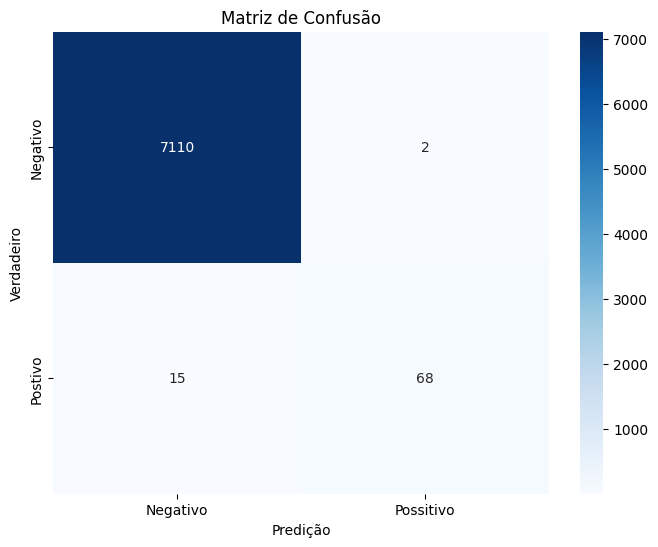

In [37]:
#Visualiza a matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negativo', 'Possitivo'], yticklabels=['Negativo', 'Postivo'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [39]:
#Adiciona as previsões ao DF de Potenciais clientes
potential_customers['previsao_emprestimo'] = predictions

In [40]:
#Exibe os potenciais clientes que tem maior probabilidade de receber empréstimos
clientes_abordar = potential_customers[potential_customers['previsao_emprestimo'] == 1]
print(clientes_abordar)

Empty DataFrame
Columns: [RELACIONAMENTO, RENDA, SALDO_ATUAL, ESTADO_CIVIL_D, ESTADO_CIVIL_M, ESTADO_CIVIL_S, ESTADO_CIVIL_W, GRADUACAO_HGH, GRADUACAO_MAS, GRADUACAO_OTH, GRADUACAO_PHD, GRADUACAO_PRI, GRADUACAO_PRS, GRADUACAO_SEC, EMPREGO_PVE, EMPREGO_RET, EMPREGO_SFE, EMPREGO_STE, previsao_emprestimo]
Index: []


In [ ]:
#Selecionei as características relevantes e dividi os dados em conjuntos de treino e teste
#Padronização: Dados padronizados para melhorar o desempenho do modelo
#Treinamento: Usei a regressão logística para treinar o modelo
#Avaliação: Avaliei o modelo usando uma matriz de confusão e um relatório de classificação
#Previsão: Fiz previsões para os potenciais clientes e adicionei as previsões ao DataFrame